[*********************100%%**********************]  11 of 11 completed


期末策略累積報酬率 (多空套利): 36.44%
期末作多籃子累積報酬率: 42.01%
期末做空籃子累積報酬率: -5.57%
期末大盤累積報酬率: 31.93%
期末做多原做空籃子累積報酬率: 0.60%

多空套利策略最大回撤: -12.21%
作多籃子最大回撤: -22.32%
做空籃子最大回撤: -24.17%
大盤最大回撤: -18.69%
做多原做空籃子最大回撤: -19.68%

多空套利策略夏普比率: 1.65
作多籃子夏普比率: 1.42
做空籃子夏普比率: -0.31
大盤夏普比率: 1.50
做多原做空籃子夏普比率: -0.00

多空套利策略崔娜比率: 2.26
作多籃子崔娜比率: 0.49
做空籃子崔娜比率: 0.11
大盤崔娜比率: 0.32
做多原做空籃子崔娜比率: -0.00


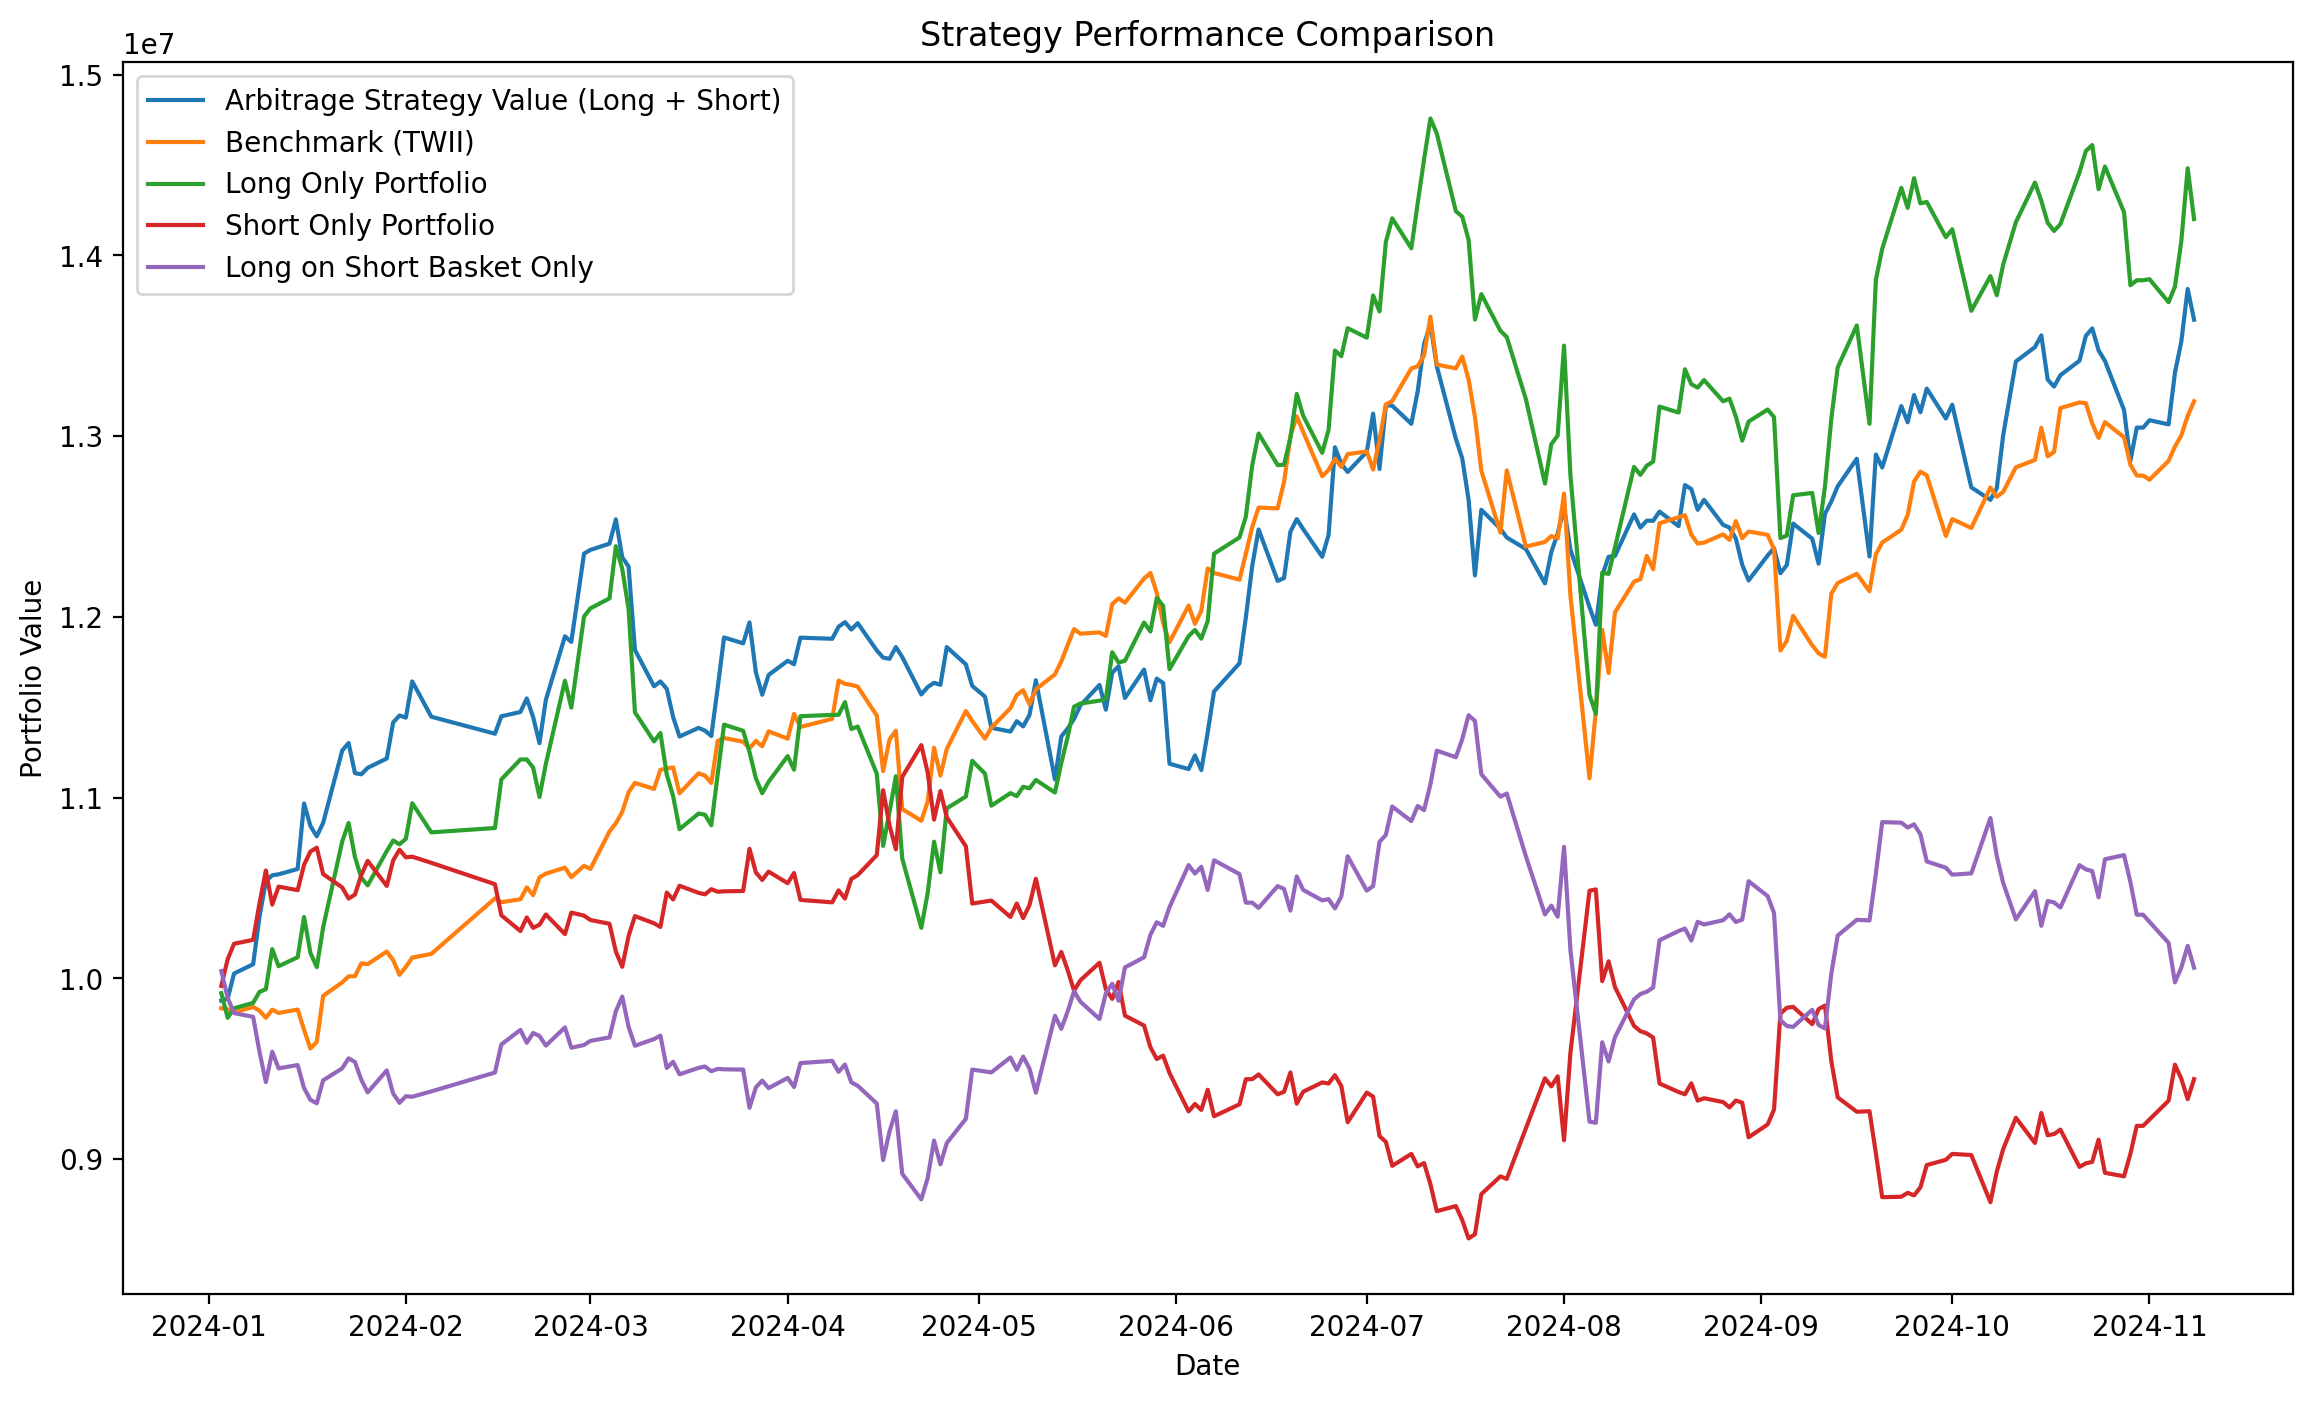

In [1]:
#直接平均 最後用這個就好
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定義股票籃子和對應的比重
long_stocks = {'3227.TWO':0.2,'2345.TW': 0.2,'6806.TW':0.2,'6669.TW':0.2,'8114.TW':0.2}  # 買籃子中的股票及其比重
short_stocks = {'2351.TW':0.2,'2444.TW':0.2,'6581.TW':0.2,'6235.TW':0.2,'3022.TW':0.2}  # 放空籃子中的股票及其比重
benchmark_index = '^TWII'  # 大盤指數 (S&P 500)

# 下載資料
start_date = '2024-01-01'
end_date = '2024-11-09'
tickers = list(long_stocks.keys()) + list(short_stocks.keys()) + [benchmark_index]
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# 計算每日報酬率
returns = data.pct_change().dropna()

# 計算長倉和空倉籃子的加權回報
long_returns = sum(returns[stock] * weight for stock, weight in long_stocks.items())
short_returns = sum(returns[stock] * weight for stock, weight in short_stocks.items()) * -1  # 空倉回報為負
strategy_returns = long_returns + short_returns
benchmark_returns = returns[benchmark_index]
short_as_long_returns = sum(returns[stock] * weight for stock, weight in short_stocks.items())  # 將做空股票池作為做多

# 設置初始資金
initial_investment = 10_000_000
long_value = (1 + long_returns).cumprod() * initial_investment
short_value = (1 + short_returns).cumprod() * initial_investment
strategy_value = long_value + short_value - initial_investment  # 多空套利策略
benchmark_value = (1 + benchmark_returns).cumprod() * initial_investment
short_as_long_value = (1 + short_as_long_returns).cumprod() * initial_investment  # 做多做空股票池

# 計算最大回撤
def calculate_max_drawdown(value_series):
    peak = value_series.cummax()
    drawdown = (value_series - peak) / peak
    return drawdown.min()

max_drawdown_long = calculate_max_drawdown(long_value)
max_drawdown_short = calculate_max_drawdown(short_value)
max_drawdown_strategy = calculate_max_drawdown(strategy_value)
max_drawdown_benchmark = calculate_max_drawdown(benchmark_value)
max_drawdown_short_as_long = calculate_max_drawdown(short_as_long_value)

# 計算夏普比率和崔娜比率
#risk_free_rate = 0.01
def calculate_sharpe_ratio(returns, risk_free_rate=0.04):
    return (returns.mean() - risk_free_rate / 252) / returns.std() * np.sqrt(252)

def calculate_treynor_ratio(returns, benchmark_returns, risk_free_rate=0.04):
    beta = np.cov(returns, benchmark_returns)[0, 1] / np.var(benchmark_returns)
    return (returns.mean() - risk_free_rate / 252) / beta * 252

sharpe_ratio_long = calculate_sharpe_ratio(long_returns)
sharpe_ratio_short = calculate_sharpe_ratio(short_returns)
sharpe_ratio_strategy = calculate_sharpe_ratio(strategy_returns)
sharpe_ratio_benchmark = calculate_sharpe_ratio(benchmark_returns)
sharpe_ratio_short_as_long = calculate_sharpe_ratio(short_as_long_returns)

treynor_ratio_long = calculate_treynor_ratio(long_returns, benchmark_returns)
treynor_ratio_short = calculate_treynor_ratio(short_returns, benchmark_returns)
treynor_ratio_strategy = calculate_treynor_ratio(strategy_returns, benchmark_returns)
treynor_ratio_benchmark = calculate_treynor_ratio(benchmark_returns, benchmark_returns)
treynor_ratio_short_as_long = calculate_treynor_ratio(short_as_long_returns, benchmark_returns)

# 計算期末累積報酬率
final_return_long = (long_value[-1] - initial_investment) / initial_investment
final_return_short = (short_value[-1] - initial_investment) / initial_investment
final_return_strategy = (strategy_value[-1] - initial_investment) / initial_investment
final_return_benchmark = (benchmark_value[-1] - initial_investment) / initial_investment
final_return_short_as_long = (short_as_long_value[-1] - initial_investment) / initial_investment

# 輸出相關資訊
print(f"期末策略累積報酬率 (多空套利): {final_return_strategy * 100:.2f}%")
print(f"期末作多籃子累積報酬率: {final_return_long * 100:.2f}%")
print(f"期末做空籃子累積報酬率: {final_return_short * 100:.2f}%")
print(f"期末大盤累積報酬率: {final_return_benchmark * 100:.2f}%")
print(f"期末做多原做空籃子累積報酬率: {final_return_short_as_long * 100:.2f}%\n")

print(f"多空套利策略最大回撤: {max_drawdown_strategy * 100:.2f}%")
print(f"作多籃子最大回撤: {max_drawdown_long * 100:.2f}%")
print(f"做空籃子最大回撤: {max_drawdown_short * 100:.2f}%")
print(f"大盤最大回撤: {max_drawdown_benchmark * 100:.2f}%")
print(f"做多原做空籃子最大回撤: {max_drawdown_short_as_long * 100:.2f}%\n")

print(f"多空套利策略夏普比率: {sharpe_ratio_strategy:.2f}")
print(f"作多籃子夏普比率: {sharpe_ratio_long:.2f}")
print(f"做空籃子夏普比率: {sharpe_ratio_short:.2f}")
print(f"大盤夏普比率: {sharpe_ratio_benchmark:.2f}")
print(f"做多原做空籃子夏普比率: {sharpe_ratio_short_as_long:.2f}\n")

print(f"多空套利策略崔娜比率: {treynor_ratio_strategy:.2f}")
print(f"作多籃子崔娜比率: {treynor_ratio_long:.2f}")
print(f"做空籃子崔娜比率: {treynor_ratio_short:.2f}")
print(f"大盤崔娜比率: {treynor_ratio_benchmark:.2f}")
print(f"做多原做空籃子崔娜比率: {treynor_ratio_short_as_long:.2f}")

# 繪製結果
plt.figure(figsize=(14, 8), dpi=200)
plt.plot(strategy_value, label='Arbitrage Strategy Value (Long + Short)')
plt.plot(benchmark_value, label='Benchmark (TWII)')
plt.plot(long_value, label='Long Only Portfolio')
plt.plot(short_value, label='Short Only Portfolio')
plt.plot(short_as_long_value, label='Long on Short Basket Only')
plt.title('Strategy Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()
